## Static face detection

In [1]:
import numpy as np
import cv2
from PIL import Image
from IPython.display import display

In [2]:
#load the xml files for face, eye and mouth detection into the program
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
# mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')

In [19]:
image = cv2.imread('./images/face-detection/person.png')

In [20]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
#identify the face using haar-based classifiers
faces = face_cascade.detectMultiScale(image, 1.4, 4)

In [22]:
#iteration through the faces array and draw a rectangle
for(x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

In [23]:
# Save the modified image
cv2.imwrite('output/face_detected-poster.png', image)

True

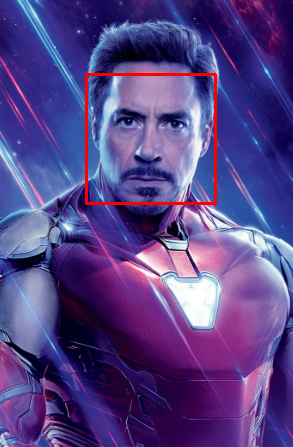

In [24]:
img = Image.open('./output/face_detected-poster.png')
display(img)